In [1]:
#LOAD USEFULL FUNCTIONS 
noExt=function(x){
return(tools::file_path_sans_ext(x))
}
bnoExt=function(x){
return(basename(tools::file_path_sans_ext(x)))
}
fNumber=function(x){
sapply(x,FUN=function(x){
strsplit(x,"__")[[1]][2]
})
}
rRider=function(x){
sapply(x,FUN=function(x){
strsplit(x,"-RIDER")[[1]][1]
})
}
system("chmod +x /home/Riderv2/callIt.sh")

In [3]:
#LOAD LIBRARIES 
library("argparser");
library(gtools);
library("GenomicRanges");
library("ggVennDiagram");

library(data.table)

In [4]:
#SETTING PATH 
path="/sharedFolder/Data/1_HTGTS/6_BCELL_LIME1/TEST2/single/"
results="/sharedFolder/Results/Hotspot/Revision_2/"
system(paste("chmod -R 777 /sharedFolder",sep=""))
dir.create(results,recursive=TRUE)
riderPath="/sharedFolder/"

[1] "1__MEC-1_AID-WT_Idelalisib_DMSO-1_PairEnd.5Primer.AlignedSeqMasked.Forward.final.good.bed"
[1] "2__MEC-1_AID-WT_Idelalisib_DMSO-2_PairEnd.5Primer.AlignedSeqMasked.Forward.final.good.bed"
[1] "3__MEC-1_AID-WT_Idelalisib_DMSO-3_PairEnd.5Primer.AlignedSeqMasked.Forward.final.good.bed"
[1] "4__MEC-1_AID-WT_Idelalisib_DMSO-4_PairEnd.5Primer.AlignedSeqMasked.Forward.final.good.bed"
[1] "5__MEC-1_AID-WT_Idelalisib_DMSO-5_PairEnd.5Primer.AlignedSeqMasked.Forward.final.good.bed"
[1] "6__MEC-1_AID-WT_Idelalisib_Tazemetostat-1_PairEnd.5Primer.AlignedSeqMasked.Forward.final.good.bed"
[1] "7__MEC-1_AID-WT_Idelalisib_Tazemetostat-2_PairEnd.5Primer.AlignedSeqMasked.Forward.final.good.bed"
[1] "8__MEC-1_AID-WT_Idelalisib_Tazemetostat-3_PairEnd.5Primer.AlignedSeqMasked.Forward.final.good.bed"
[1] "9__MEC-1_AID-WT_Idelalisib_Tazemetostat-4_PairEnd.5Primer.AlignedSeqMasked.Forward.final.good.bed"
[1] "10__MEC-1_AID-WT_Idelalisib_Tazemetostat-5_PairEnd.5Primer.AlignedSeqMasked.Forward.final.good.bed"

png 
  2

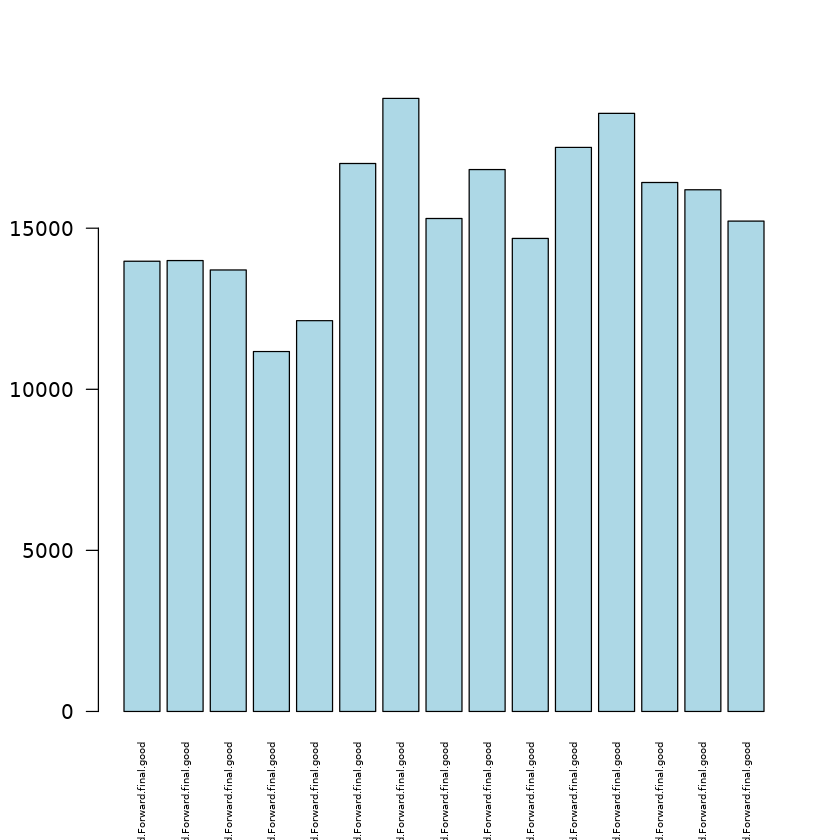

In [5]:
#STEP 0 : evaluate library sizes 
a=list.files(path,pattern=".bed",recursive=TRUE)
a=mixedsort(a)
score=c()
for(i in a){
print(i)
temp=read.table(paste(path,"/",i,sep=""),header=FALSE,sep="\t")
score=append(score,nrow(temp))
}
a2=sapply(a,FUN=function(x){strsplit(x,".bed")[[1]][1]})
a2=sapply(a2,FUN=function(x){strsplit(x,"__")[[1]][2]})
scoreD=data.frame(score=score,names=a2)
options(scipen=10000)
brakes=c()
compile=TRUE
temp=0
while(compile){
brakes=append(brakes,temp)
temp=temp+500
if(temp>max(score)){compile=FALSE}
}
scoreDD=cbind( as.vector(as.matrix(scoreD[2])),scoreD[,1])
rownames(scoreDD)=scoreDD[,1]
junction=scoreD$score
names(junction)=scoreD$names
pdf(paste(results,"/library_size.pdf",sep=""))
barplot(junction,las=2,cex.names=0.5,col="lightblue")
dev.off()
barplot(junction,las=2,cex.names=0.5,col="lightblue")
write.table(scoreDD,paste(results,"/library_size.txt",sep=""),sep="\t",col.names=FALSE,row.names=FALSE,quote=FALSE)

[1] "1__MEC-1_AID-WT_Idelalisib_DMSO.bed"
[1] "2__MEC-1_AID-WT_Idelalisib_Tazemetostat.bed"
[1] "3__MEC-1_AID-WT_Idelalisib_Valemetostat.bed"


png 
  2

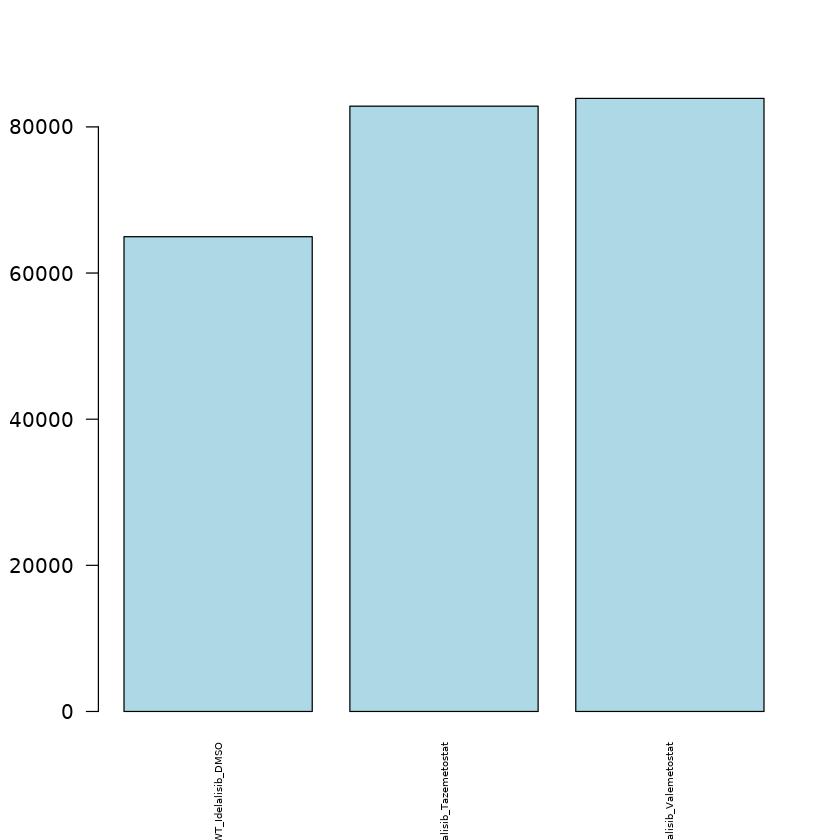

In [6]:
path="/sharedFolder/Data/1_HTGTS/6_BCELL_LIME1/TEST2/pooled//"
#STEP 0 : evaluate library sizes 
a=list.files(path,pattern=".bed",recursive=TRUE)
a=mixedsort(a)
score=c()
for(i in a){
print(i)
temp=read.table(paste(path,"/",i,sep=""),header=FALSE,sep="\t")
score=append(score,nrow(temp))
}
a2=sapply(a,FUN=function(x){strsplit(x,".bed")[[1]][1]})
a2=sapply(a2,FUN=function(x){strsplit(x,"__")[[1]][2]})
scoreD=data.frame(score=score,names=a2)
options(scipen=10000)
brakes=c()
compile=TRUE
temp=0
while(compile){
brakes=append(brakes,temp)
temp=temp+500
if(temp>max(score)){compile=FALSE}
}
scoreDD=cbind( as.vector(as.matrix(scoreD[2])),scoreD[,1])
rownames(scoreDD)=scoreDD[,1]
junction=scoreD$score
names(junction)=scoreD$names
pdf(paste(results,"/library_sizePooled.pdf",sep=""))
barplot(junction,las=2,cex.names=0.5,col="lightblue")
dev.off()
barplot(junction,las=2,cex.names=0.5,col="lightblue")
write.table(scoreDD,paste(results,"/library_sizePooled.txt",sep=""),sep="\t",col.names=FALSE,row.names=FALSE,quote=FALSE)

In [8]:
#STEP 1 : Evaluate all hotspots
a=list.files(path,pattern=".bed")
a=mixedsort(a)
setwd(riderPath)
for(i in a){
print("hey")
print(paste(results,"/",fNumber(noExt(i)),sep=""))
dir.create(paste(results,"/",fNumber(noExt(i)),sep=""))
system( paste(riderPath,"/callIt.sh ",path,"/",i," ",results,"/",fNumber(noExt(i)),sep="") )
ff=list.dirs(path,recursive=FALSE,full.names=FALSE)
ff=ff[grep("results",ff)]
ff=paste(path,"/",ff,sep="")
system(paste("mv ",ff," ",results,"/",fNumber(noExt(i)),sep=""))
}

[1] "hey"
[1] "/sharedFolder/Results/Hotspot/Revision_2//MEC-1_AID-WT_Idelalisib_DMSO"


Warning message in dir.create(paste(results, "/", fNumber(noExt(i)), sep = "")):
“'/sharedFolder/Results/Hotspot/Revision_2//MEC-1_AID-WT_Idelalisib_DMSO' already exists”


[1] "hey"
[1] "/sharedFolder/Results/Hotspot/Revision_2//MEC-1_AID-WT_Idelalisib_Tazemetostat"


Warning message in dir.create(paste(results, "/", fNumber(noExt(i)), sep = "")):
“'/sharedFolder/Results/Hotspot/Revision_2//MEC-1_AID-WT_Idelalisib_Tazemetostat' already exists”


[1] "hey"
[1] "/sharedFolder/Results/Hotspot/Revision_2//MEC-1_AID-WT_Idelalisib_Valemetostat"


Warning message in dir.create(paste(results, "/", fNumber(noExt(i)), sep = "")):
“'/sharedFolder/Results/Hotspot/Revision_2//MEC-1_AID-WT_Idelalisib_Valemetostat' already exists”


In [9]:
#STEP 2 : Generating Hotspot Database 
ll=list.files(results,recursive=TRUE,pattern=".txt")
ll=ll[-grep("library_size",ll)]
Database=read.table(paste(results,ll[1],sep="/"),header=TRUE,sep="\t")
Database=Database[,c(2,3,4,14,9)]
Database=Database[1,]
Database=Database[-1,]
colnames(Database)[c(4,5)]=c("Signal2Noise","EventCounts")
HotspotBelonging=c()
for(i in ll){
temp=read.table(paste(results,i,sep="/"),header=TRUE,sep="\t")[,c(2,3,4,14,9)]
colnames(temp)[c(4,5)]=c("Signal2Noise","EventCounts")
Database=rbind(Database,temp)
HotspotBelonging=append(HotspotBelonging,as.vector(rep(rRider(fNumber(bnoExt(i))),nrow(temp))))
}
Database=cbind(Database,HotspotBelonging)


In [35]:
#REMOVING MYC (2 mb) and IGH locus 
#db=GRanges(seqnames=as.matrix(Database[,1]),ranges=IRanges(start = as.numeric(Database[,2])-100,end=as.numeric(Database[,3])+100))
#myc=GRanges(seqnames="chr15",ranges=IRanges(start=60562682,end=63076130))
#toRemove=findOverlaps(myc,db)@to
#igh=GRanges(seqnames="chr12",ranges=IRanges(start=114419999,end=114680000))
#toRemove=append(toRemove,findOverlaps(igh,db)@to)
#Database=Database[-toRemove,]


In [10]:
#Standardize the Database with proper length and proper count, and proper rpm
db=GRanges(seqnames=as.matrix(Database[,1]),ranges=IRanges(start = as.numeric(Database[,2]),end=as.numeric(Database[,3])))
db=reduce(db)
for(i in seq(1,nrow(Database))){
grI=GRanges(seqnames=as.matrix(Database[i,1]),ranges=IRanges(start=as.numeric(Database[i,2]),end=as.numeric(Database[i,3])))
Database[i,1]=as.vector((db[findOverlaps(db,grI)@from]@seqnames)@values)
Database[i,2]=as.numeric((db[findOverlaps(db,grI)@from]@ranges)@start)
Database[i,3]=Database[i,2]+as.numeric((db[findOverlaps(db,grI)@from]@ranges)@width)-1
}

for(i in a){
temp=read.table(paste(path,"/",i,sep=""),header=FALSE,sep="\t")
tempbed=GRanges(seqnames=as.matrix(temp[,1]),ranges=IRanges(start = as.numeric(temp[,2]),end=as.numeric(temp[,3])))
for(j in seq(1,nrow(Database))){
if(Database[j,6]==as.vector(fNumber(noExt(i)))){
db2=GRanges(seqnames=as.matrix(Database[j,1]),ranges=IRanges(start = as.numeric(Database[j,2]),end=as.numeric(Database[j,3])))
Database[j,5]=countOverlaps(db2,tempbed)
Database[j,4]=(Database[j,5]/nrow(temp))*1000000
}


}
system("echo yeah")
}

In [11]:
#Add unique ID_LIST to Database  
hh=GRanges(seqnames=as.matrix(Database[,1]),ranges=IRanges(start = as.numeric(Database[,2])-100,end=as.numeric(Database[,3])+100))
positions=numeric(length(hh))
for(i in seq(hh)){
if(length(findOverlaps(hh,hh[i]))!=0){
positions[findOverlaps(hh,hh[i])@from]=i
}else{
positions[i]=i
}
system("echo yeah")
}
Database=cbind(Database,positions)
colnames(Database)[7]="hotspotID"
#DATABASE contains all Hotspots in all conditions with : 
#Chromosome	ChrStart	ChrEnd	Signal2Noise	EventCounts	HotspotBelonging	hotspotID

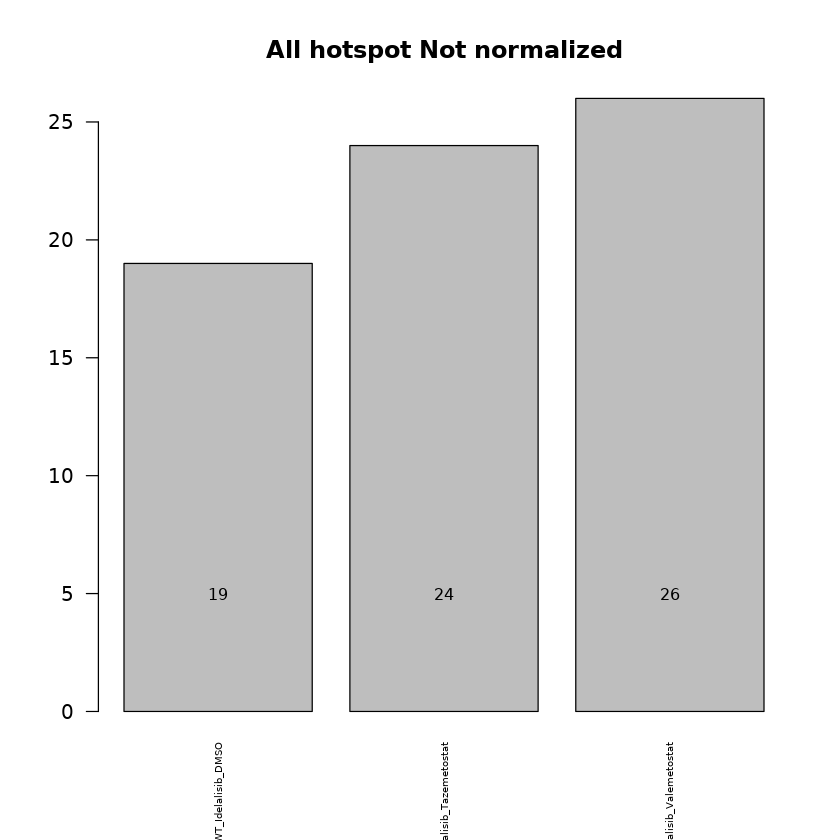

png 
  2

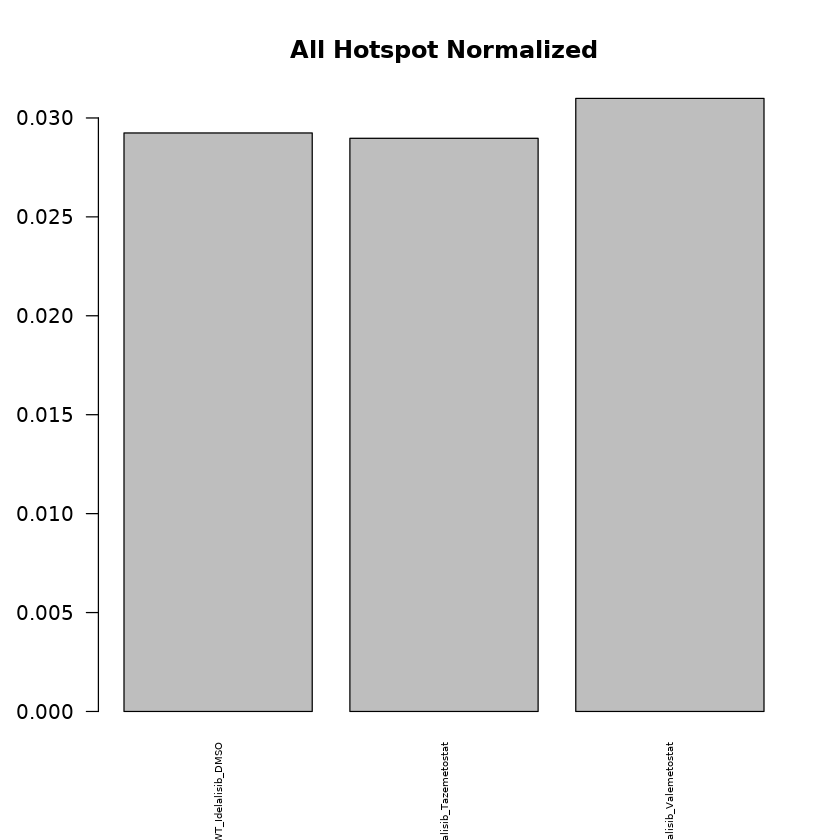

In [12]:
#Plot hotspot statistic Normalized and not 
Database2=Database[!duplicated(Database),]
bb=barplot(table(Database2[,6]),main="All hotspot Not normalized",cex.names=0.5,las=2)
text(bb,5,table(Database2[,6]),cex=.8)
normalized=(table(Database2[,6])/as.numeric(scoreDD[names(table(Database2[,6])),2])*100)
bb=barplot(normalized,main="All Hotspot Normalized",cex.names=0.5,las=2)
pdf(paste(results,"/HotspotNumber.pdf",sep=""))
bb=barplot(table(Database2[,6]),main="All Hotspot Not normalized",cex.names=0.5,las=2)
text(bb,5,table(Database2[,6]),cex=.8)
normalized=(table(Database2[,6])/as.numeric(scoreDD[names(table(Database2[,6])),2])*100)
bb=barplot(normalized,main="All Hotspot Normalized",cex.names=0.5,las=2)
dev.off()

In [13]:
Database=Database[!duplicated(Database),]
write.table(Database[,c(1,2,3)],paste(results,"/hotSpot.bed",sep=""),col.names=FALSE,row.names=FALSE,sep="\t",quote=FALSE)
write.table(Database,paste(results,"/Database.csv",sep=""),sep=",",col.names=TRUE,row.names=FALSE)


In [15]:
library("RCircos")
data <- fread(paste(results,"/Database_annotated.csv",sep=""))

# Seleziona solo le colonne necessarie per il plot
data <- data[, c("Chromosome", "ChrStart", "ChrEnd")]

# Crea un dataframe per il plot
plot_data <- data.frame(
  chr = data$Chromosome,
  start = data$ChrStart,
  end = data$ChrEnd,
  stringsAsFactors = FALSE
)

# Create a vector of unique chromosome names
chromosomes <- unique(plot_data$chr)

# Define the ideogram positions and labels
ideograms <- list()
for (i in 1:length(chromosomes)) {
  ideograms[[i]] <- ideogram(
    chromosome = chromosomes[i],
    start = 0,
    end = max(plot_data$end[plot_data$chr == chromosomes[i]]),
    labels.track.height = 0.1,
    track.height = 0.2
  )
}

# Create the circular plot
circos.par(cell.padding = c(0, 0, 0, 0))
circos.initialize(factors = chromosomes, xlim = c(0, max(plot_data$end)), ideogram = ideograms)
circos.trackPlotRegion(ylim = c(0, 1))
circos.genomicTrack(plot_data, panel.fun = function(region, value, ...) {
  circos.lines(region, value, ...)
}, track.height = 0.2, bg.border = NA)

# Save the plot to a file
circos.clear()
pdf("circular_plot.pdf")
circos.genomicTrack(plot_data, panel.fun = function(region, value, ...) {
  circos.lines(region, value, ...)
}, track.height = 0.2, bg.border = NA)
dev.off()

ERROR: Error in ideogram(chromosome = chromosomes[i], start = 0, end = max(plot_data$end[plot_data$chr == : could not find function "ideogram"


In [14]:
#FINISH